In [1]:
# COCO classes
classes = [
    "person","bicycle","car","motorcycle","airplane","bus","train","truck","boat","traffic light",
    "fire hydrant","stop sign","parking meter","bench","bird","cat","dog","horse","sheep","cow",
    "elephant","bear","zebra","giraffe","backpack","umbrella","handbag","tie","suitcase","frisbee",
    "skis","snowboard","sports ball","kite","baseball bat","baseball glove","skateboard","surfboard",
    "tennis racket","bottle","wine glass","cup","fork","knife","spoon","bowl","banana","apple",
    "sandwich","orange","broccoli","carrot","hot dog","pizza","donut","cake","chair","couch",
    "potted plant","bed","dining table","toilet","tv","laptop","mouse","remote","keyboard","cell phone",
    "microwave","oven","toaster","sink","refrigerator","book","clock","vase","scissors","teddy bear",
    "hair drier","toothbrush"
]

Detections: [
  {
    "class": "bicycle",
    "confidence": 0.8911857008934021,
    "box": [
      1400,
      916,
      4663,
      3102
    ]
  },
  {
    "class": "bicycle",
    "confidence": 0.9119312167167664,
    "box": [
      1397,
      911,
      4664,
      3113
    ]
  },
  {
    "class": "bicycle",
    "confidence": 0.9289003014564514,
    "box": [
      1397,
      913,
      4661,
      3115
    ]
  },
  {
    "class": "bicycle",
    "confidence": 0.9226174354553223,
    "box": [
      1400,
      911,
      4661,
      3114
    ]
  },
  {
    "class": "bicycle",
    "confidence": 0.9143493175506592,
    "box": [
      1401,
      907,
      4663,
      3110
    ]
  },
  {
    "class": "bicycle",
    "confidence": 0.9455617666244507,
    "box": [
      1396,
      906,
      4661,
      3109
    ]
  },
  {
    "class": "bicycle",
    "confidence": 0.9304975867271423,
    "box": [
      1399,
      908,
      4659,
      3107
    ]
  },
  {
    "class": "bicycle",
    "c

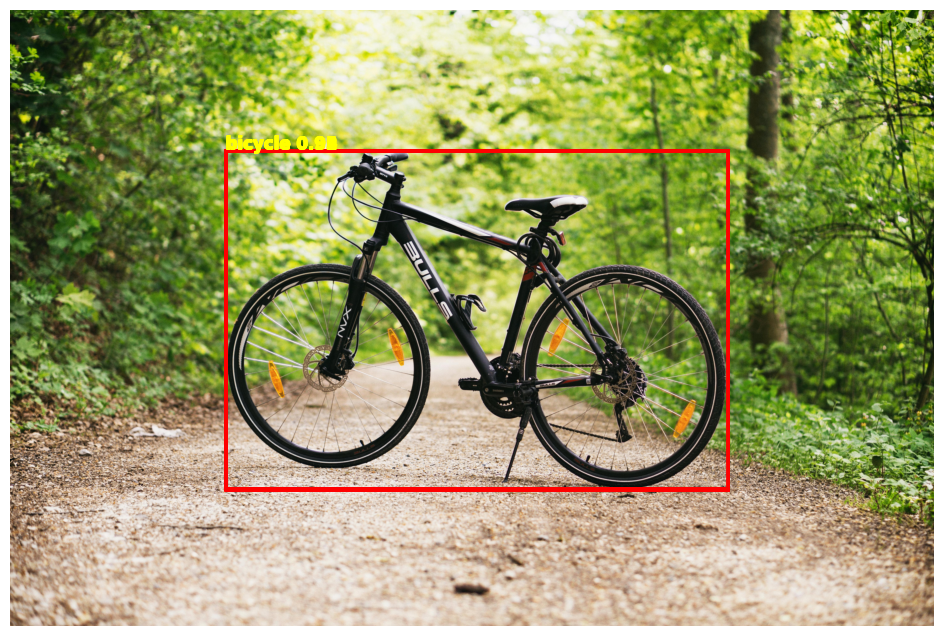

In [3]:
import requests
import base64
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import io

# --- Step 1: Load and encode image ---
image_path = "carrot.jpg"
with open(image_path, "rb") as f:
    img_bytes = f.read()
img_base64 = base64.b64encode(img_bytes).decode("utf-8")

# --- Step 2: Prepare payload ---
payload = {"image": img_base64}
url = "https://zbpuxumseg.execute-api.ap-southeast-1.amazonaws.com/prod/"
headers = {"Content-Type": "application/json"}

# --- Step 3: Send POST request ---
response = requests.post(url, data=json.dumps(payload), headers=headers)

# --- Step 4: Read response ---
if response.status_code == 200:
    result = response.json()
    detections = result.get("detections", [])
    print("Detections:", json.dumps(detections, indent=2))
else:
    print("Error:", response.status_code, response.text)
    detections = []

# --- Step 5: Load image using PIL ---
image = Image.open(image_path)
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# --- Step 6: Plot bounding boxes ---
for det in detections:
    x1, y1, x2, y2 = det["box"]
    class_name = det["class"]
    conf = det["confidence"]

    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x1, y1-5, f"{class_name} {conf:.2f}", color='yellow', fontsize=12, weight='bold')

plt.axis('off')
plt.show()
